In [1]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
warnings.filterwarnings('ignore')
#Sample_Size
sample_size=2000

In [3]:
#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)  
z_critical 

1.6448536269514722

In [4]:
# Critical Value
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1
critical_value 

12.591587243743977

In [5]:
#Reading file
data=pd.read_csv('file.csv')
data

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,LA009574,No,all_other,14.61%,344.76,12.180755,10.39,672,10474.000000,215372,82.1,0,Less than 5,No,No
9574,LA009575,No,all_other,12.53%,257.70,11.141862,0.21,722,4380.000000,184,1.1,0,Less than 10,No,No
9575,LA009576,No,debt_consolidation,10.71%,97.81,10.596635,13.09,687,3450.041667,10036,82.9,0,Less than 10,No,No
9576,LA009577,No,home_improvement,16.00%,351.58,10.819778,19.18,692,1800.000000,0,3.2,0,Less than 10,No,No


In [6]:
# Random sample of size 2000
data_sample=data.sample(n = sample_size, random_state=0)
data_sample

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
3343,LA003344,Yes,all_other,11.89%,49.75,10.829729,16.87,687,2314.958333,962,64.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes
1741,LA001742,Yes,debt_consolidation,16.95%,712.54,11.918391,13.61,672,4830.041667,16473,94.1,0,Less than 5,Yes,Yes
5160,LA005161,Yes,debt_consolidation,17.39%,286.78,11.189962,19.59,667,7020.000000,19892,67.0,1,Less than 5,No,Yes
7760,LA007761,No,credit_card,13.12%,202.51,9.392662,4.40,657,898.958333,5251,49.3,0,Less than 10,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,LA003832,Yes,all_other,9.63%,205.41,10.668955,21.01,727,3720.000000,2210,11.9,0,Less than 5,No,Yes
6864,LA006865,Yes,major_purchase,11.83%,165.67,11.002100,8.92,707,2501.000000,7990,34.3,0,Less than 5,No,Yes
1940,LA001941,Yes,credit_card,11.89%,169.14,10.239960,16.11,697,4080.000000,20722,52.1,0,Less than 5,No,Yes
2359,LA002360,Yes,debt_consolidation,13.79%,340.76,11.168631,24.91,692,8850.000000,6344,32.4,0,Less than 5,Yes,Yes


In [7]:
# Mean of sample
sample_mean=data_sample.installment.mean()
print('sample mean:', sample_mean)

sample mean: 317.610965


In [8]:
# Sample standard deviation
sample_std=data_sample.installment.std()
print('sample_std:', sample_std)

sample_std: 207.64991593475935


In [9]:
margin_of_error = z_critical * (sample_std/math.sqrt(sample_size))
print("Margin of error:",margin_of_error)

Margin of error: 7.637373299879684


In [10]:
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("confidence interval:", confidence_interval)

confidence interval: (309.9735917001203, 325.2483382998797)


In [11]:
# Population mean
true_mean = data.installment.mean()
print("True mean of data:", true_mean)

True mean of data: 319.08941323867197


## Task 2:CLT Central Limit Theorem

In [12]:
sample_size = np.array([20,50,100])

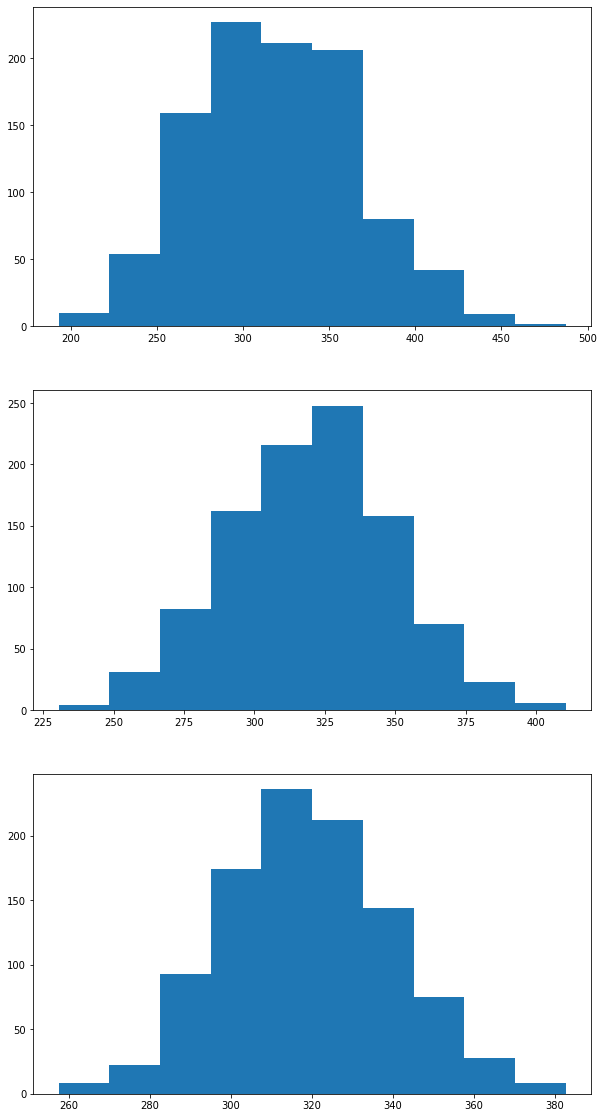

In [13]:
#Creating different subplots
fig, axes = plt.subplots(3,1, figsize=(10,20))

#Running loop to iterate through rows
for i in range(len(sample_size)):
    
    #initialising a list
    m = []
    
    #Loop to implement the no. of samples
    for j in range(1000):
        
        #Finding mean of a random sample
        mean = data['installment'].sample(sample_size[i]).mean()
        
        #Appending the mean to the list
        m.append(mean)
        
    #Converting the list to series
    mean_series = pd.Series(m)
    
    #Plotting the histogram for the series
    axes[i].hist(mean_series)
    
#Displaying the plot
plt.show()

In [22]:
# Removing the last character from the values in column
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
data['int.rate'] = data['int.rate'].astype(float)/100
data.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,0.001180,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,0.001071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,0.001357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,0.001000,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,0.001420,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


### Applying ztest for the hypothesis
#### Let's do a hypothesis testing(one-sided) on that belief
#### Null Hypothesis = H0 : μ = 12%  There is no difference in interest rate being given to people with purpose as 'small_business'.

#### Alternate Hypothesis = H1 : μ > 12%  Interest rate being given to people with purpose as 'small_business' is higher than the average interest rate.

In [15]:
z_statistic_1, p_value_1 = ztest(x1 = data[data['purpose'] == 'small_business']['int.rate'],
                        value = data['int.rate'].mean(), alternative = 'larger')

print("z-statistic is:", z_statistic_1)
print("p-value is:", p_value_1)

z-statistic is: 12.321276240200591
p-value is: 3.4792131906806856e-35


### Task 4: Installment vs Loan Defaulting
#### Monthly installments (installment column) customers have to pay might have some sort of effect on loan defaulters
#### Let's do a hypothesis testing(two-sided) on that belie
#### Null Hypothesis = H0 : μ D(yes)==D μ(no) There is no difference in installments being paid by loan defaulters and loan non defaulters
#### Alternate Hypothesis = H1 : μ D(yes)=! D μ(no)  There is difference in installments being paid by loan defaulters and loan non defaulters

In [16]:
z_statistic_2, p_value_2 = ztest(x1 = data[data['paid.back.loan'] == 'No']['installment'], 
                                 x2 = data[data['paid.back.loan'] == 'Yes']['installment'])

print("z-statistic 2 is:", z_statistic_2)
print("p-value 2 is:", p_value_2)

z-statistic 2 is: 4.894575287952092
p-value 2 is: 9.85182562491764e-07


### Task 5: Purpose vs Loan Defaulting
####  We think that here is a strong association between purpose of the loan(purpose column) of a person and whether that person has paid back loan (paid.back.loan column) Since both are categorical columns, we will do chi-square test to test the same
#### Null Hypothesis : Distribution of purpose across all customers is same.
#### Alternative Hypothesis : Distribution of purpose for loan defaulters and non defaulters is different.

In [21]:
# Subsetting the dataframe
yes = data[data['paid.back.loan'] == 'Yes']['purpose'].value_counts()
yes

debt_consolidation    3354
all_other             1944
credit_card           1116
home_improvement       522
small_business         447
major_purchase         388
educational            274
Name: purpose, dtype: int64

In [18]:
no = data[data['paid.back.loan'] == 'No']['purpose'].value_counts()
no

debt_consolidation    603
all_other             387
small_business        172
credit_card           146
home_improvement      107
educational            69
major_purchase         49
Name: purpose, dtype: int64

### Concating yes and no into a single dataframe

In [19]:
observed = pd.concat([yes.transpose(), no.transpose()], 1,keys=['Yes','No'])
print(observed)

                     Yes   No
debt_consolidation  3354  603
all_other           1944  387
credit_card         1116  146
home_improvement     522  107
small_business       447  172
major_purchase       388   49
educational          274   69


### Implementing chi-square test

In [20]:
chi2, p, dof, ex = chi2_contingency(observed)

print("Critical value is:", critical_value)

print("chi statistic is:", chi2)

Critical value is: 12.591587243743977
chi statistic is: 96.98469589063261
